import csv

In [2]:
import pandas as pd

df = pd.read_csv("avis_50_agent_output.csv")  # change si besoin
df.head()


,avis_text,proprete,confort,emplacement,note_client,proprete_nlp,confort_nlp,emplacement_nlp,proprete_agent,confort_agent,emplacement_agent
0,La chambre était très propre. Lit inconfortabl...,1,-1,-1,2,1,1,1,1,-1,-1
1,Il y avait de la poussière partout. Chambre sp...,-1,1,1,4,1,0,1,-1,1,1
2,Toute était impeccable. Bonne literie et faute...,1,1,1,5,0,0,1,1,1,1
3,Salle de bain insalubre. Lit trop dur. Quartie...,-1,-1,-1,1,1,0,0,-1,-1,0
4,La chambre était sale. Chambre trop petite et ...,-1,-1,-1,1,1,1,1,-1,0,0


Vérifier les colonnes présentes

In [3]:
df.columns


Index(['avis_text', 'proprete', 'confort', 'emplacement', 'note_client',
       'proprete_nlp', 'confort_nlp', 'emplacement_nlp', 'proprete_agent',
       'confort_agent', 'emplacement_agent'],
      dtype='object')

Fonction utilitaire pour évaluer

In [4]:
def accuracy(col_true, col_pred):
    return (df[col_true] == df[col_pred]).mean() * 100


Taux d'accord pour chaque modèle

In [5]:
print("=== ACCORD AVEC LE CLIENT ===")

for aspect in ["proprete", "confort", "emplacement"]:
    acc_nlp = accuracy(aspect, aspect + "_nlp")
    acc_agent = accuracy(aspect, aspect + "_agent")
    
    print(f"\nAspect : {aspect}")
    print(f"  NLP   : {acc_nlp:.2f}% d'accord")
    print(f"  Agent : {acc_agent:.2f}% d'accord")


=== ACCORD AVEC LE CLIENT ===

Aspect : proprete
  NLP   : 44.44% d'accord
  Agent : 100.00% d'accord

Aspect : confort
  NLP   : 17.78% d'accord
  Agent : 97.78% d'accord

Aspect : emplacement
  NLP   : 53.33% d'accord
  Agent : 77.78% d'accord


Trouver les erreurs des deux modèles

In [6]:
df["err_nlp_proprete"] = df["proprete"] != df["proprete_nlp"]
df["err_agent_proprete"] = df["proprete"] != df["proprete_agent"]

df["err_nlp_confort"] = df["confort"] != df["confort_nlp"]
df["err_agent_confort"] = df["confort"] != df["confort_agent"]

df["err_nlp_emplacement"] = df["emplacement"] != df["emplacement_nlp"]
df["err_agent_emplacement"] = df["emplacement"] != df["emplacement_agent"]

df.head()


,avis_text,proprete,confort,emplacement,note_client,proprete_nlp,confort_nlp,emplacement_nlp,proprete_agent,confort_agent,emplacement_agent,err_nlp_proprete,err_agent_proprete,err_nlp_confort,err_agent_confort,err_nlp_emplacement,err_agent_emplacement
0,La chambre était très propre. Lit inconfortabl...,1,-1,-1,2,1,1,1,1,-1,-1,False,False,True,False,True,False
1,Il y avait de la poussière partout. Chambre sp...,-1,1,1,4,1,0,1,-1,1,1,True,False,True,False,False,False
2,Toute était impeccable. Bonne literie et faute...,1,1,1,5,0,0,1,1,1,1,True,False,True,False,False,False
3,Salle de bain insalubre. Lit trop dur. Quartie...,-1,-1,-1,1,1,0,0,-1,-1,0,True,False,True,False,True,True
4,La chambre était sale. Chambre trop petite et ...,-1,-1,-1,1,1,1,1,-1,0,0,True,False,True,True,True,True


Comparer les erreurs globales

In [7]:
for aspect in ["proprete", "confort", "emplacement"]:
    err_nlp = df[f"err_nlp_{aspect}"].mean() * 100
    err_agent = df[f"err_agent_{aspect}"].mean() * 100
    
    print(f"\nAspect : {aspect}")
    print(f"  Erreurs NLP   : {err_nlp:.2f}%")
    print(f"  Erreurs Agent : {err_agent:.2f}%")



Aspect : proprete
  Erreurs NLP   : 55.56%
  Erreurs Agent : 0.00%

Aspect : confort
  Erreurs NLP   : 82.22%
  Erreurs Agent : 2.22%

Aspect : emplacement
  Erreurs NLP   : 46.67%
  Erreurs Agent : 22.22%


Matrice de confusion


==== MATRICE DE CONFUSION NLP (PROPRETE) ====



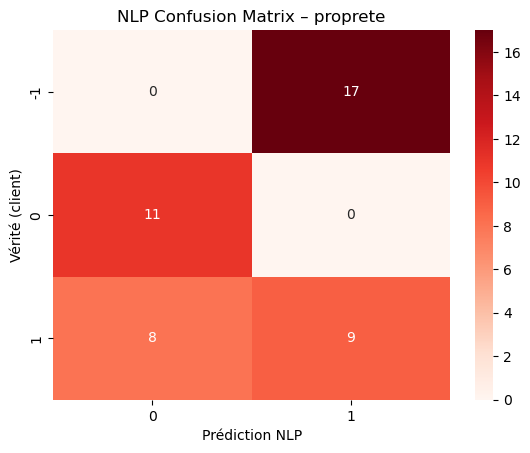


==== MATRICE DE CONFUSION AGENT IA (PROPRETE) ====



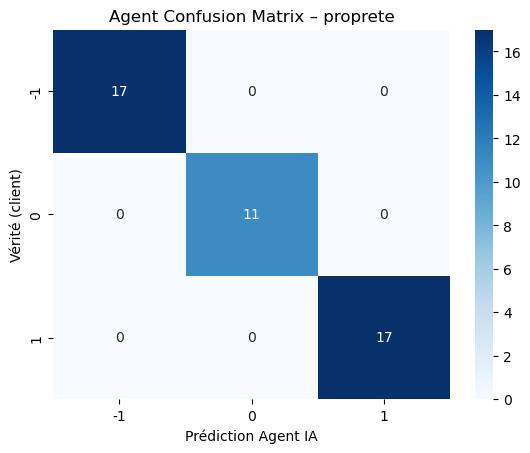


==== MATRICE DE CONFUSION NLP (CONFORT) ====



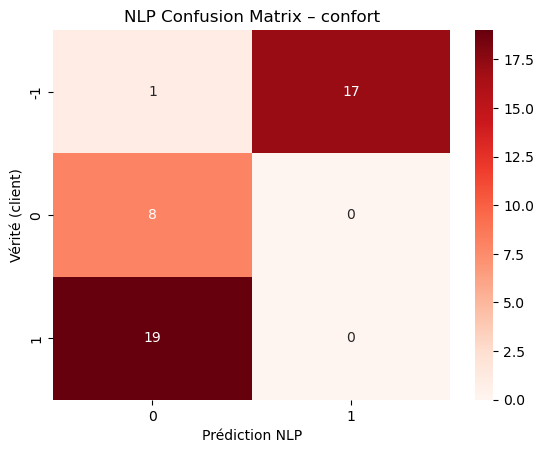


==== MATRICE DE CONFUSION AGENT IA (CONFORT) ====



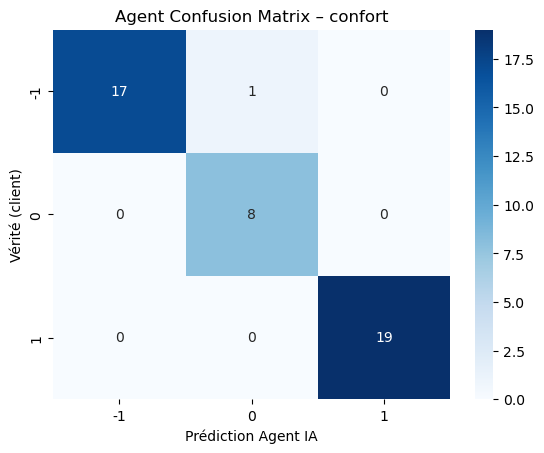


==== MATRICE DE CONFUSION NLP (EMPLACEMENT) ====



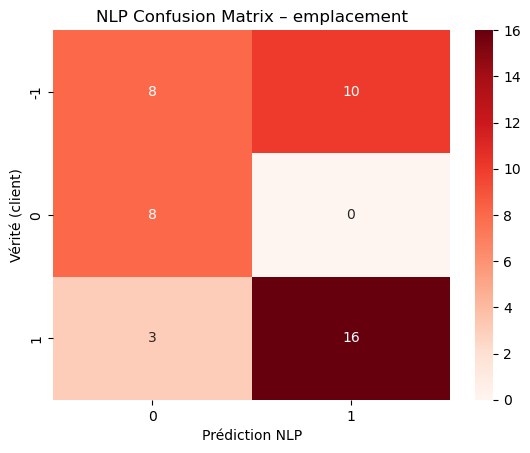


==== MATRICE DE CONFUSION AGENT IA (EMPLACEMENT) ====



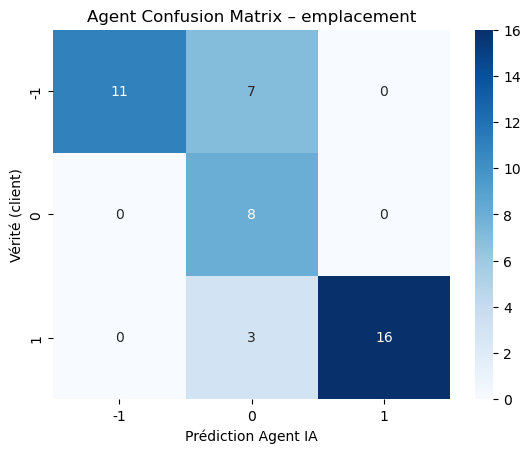

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

for aspect in ["proprete", "confort", "emplacement"]:
    
    print(f"\n==== MATRICE DE CONFUSION NLP ({aspect.upper()}) ====\n")
    ctab_nlp = pd.crosstab(df[aspect], df[aspect + "_nlp"])
    sns.heatmap(ctab_nlp, annot=True, fmt="d", cmap="Reds")
    plt.xlabel("Prédiction NLP")
    plt.ylabel("Vérité (client)")
    plt.title(f"NLP Confusion Matrix – {aspect}")
    plt.show()

    print(f"\n==== MATRICE DE CONFUSION AGENT IA ({aspect.upper()}) ====\n")
    ctab_agent = pd.crosstab(df[aspect], df[aspect + "_agent"])
    sns.heatmap(ctab_agent, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Prédiction Agent IA")
    plt.ylabel("Vérité (client)")
    plt.title(f"Agent Confusion Matrix – {aspect}")
    plt.show()


In [9]:
summary = []

for aspect in ["proprete", "confort", "emplacement"]:
    summary.append({
        "aspect": aspect,
        "accuracy_nlp": accuracy(aspect, aspect+"_nlp"),
        "accuracy_agent": accuracy(aspect, aspect+"_agent"),
    })

pd.DataFrame(summary)


,aspect,accuracy_nlp,accuracy_agent
0,proprete,44.444444,100.000000
1,confort,17.777778,97.777778
2,emplacement,53.333333,77.777778
